In [1]:
import numpy as np
import matplotlib.pyplot as plt

import limpy.lines as ll
import limpy.params as p
import limpy.utils as lu
from limpy.plotsettings import *

In [2]:
# Check first what are the available models of star formation rate
# sfr_model: available star formation model
# models: Models that convert sfr to line luminosities
sfr_model, line_lum_models = p.model_avail(line_name="CO21")
print("Available models for sfr --->", sfr_model)

print("Available models for sfr --->", line_lum_models)

Available models for sfr ---> ['Behroozi19', 'Tng300', 'Tng100', 'Silva15', 'Fonseca16']
Available models for sfr ---> ['Visbal10', 'Kamenetzky15', 'Padmanabhan18', 'Alma_scalling']


In [3]:
"""
calculate line luminosity
"""
line_name = "CII158"
sfr_model = "Silva15"
Mhalo = np.logspace(10, 14)
z= 5.8
lum_line = ll.mhalo_to_lline(Mhalo, z, line_name=line_name, model_name="Silva15-m1", 
                          sfr_model=sfr_model, use_scatter=False,)


lum_line1 = ll.mhalo_to_lline(Mhalo, z, line_name=line_name, model_name="Visbal10", 
                          sfr_model=sfr_model, use_scatter=False,)


lum_line2 = ll.mhalo_to_lline(Mhalo, z, line_name=line_name, model_name="Fonseca16", 
                          sfr_model=sfr_model, use_scatter=False,)

Text(0.5, 0, '$M_{halo}\\, [M_\\odot/h]$')

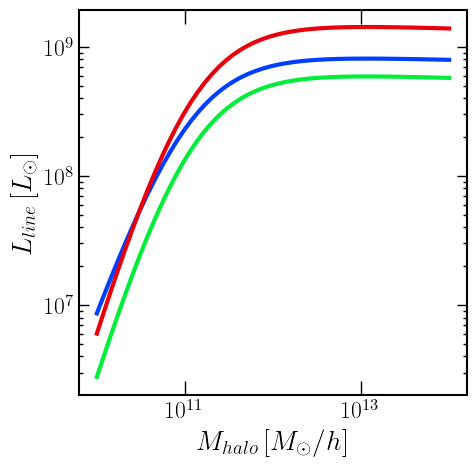

In [4]:
# plot it
fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.plot(Mhalo , lum_line, lw=3)
plt.plot(Mhalo , lum_line1, lw=3)
plt.plot(Mhalo , lum_line2, lw=3)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$L_{line}\, [L_\odot]$")
plt.xlabel("$M_{halo}\, [M_\odot/h]$")

In [9]:
"""
Plot sfr vs M_halo for different sfr models
"""
# Mass of halos 
Mhalo= np.logspace(10, 15)

#redshift
z=6
sfr_silva = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Silva15")
sfr_tng100 = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Tng100")
sfr_tng300 = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Tng300")
sfr_fonseca = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Fonseca16")
sfr_Beherozzi = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Behroozi19")

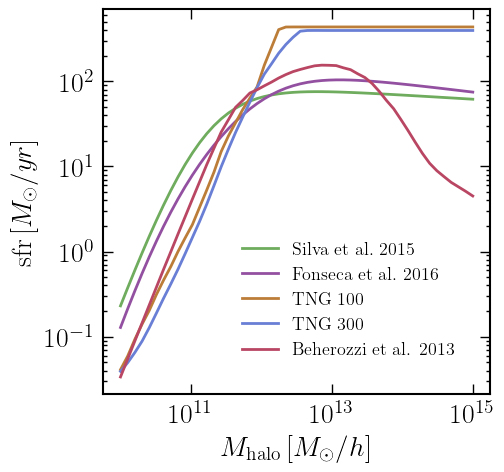

In [10]:
"""
Plot sfr vs M_halo for different sfr models
"""
colorlist=["#6fac5d",
"#9350a1",
"#bc7d39",
"#697ed5",
"#b94663"]

fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)
lw=2
ls='-'
tick_labelsize=20
pad_point=6

ax.tick_params('both', which='major', pad=pad_point, labelsize=tick_labelsize, length=7, width=1, direction='in', top=True, right=True)
ax.tick_params('both', which='minor', pad=pad_point, labelsize=tick_labelsize,  length=3, width=1, direction='in', top=True, right=True)


ax.plot(Mhalo, sfr_silva,lw=lw, ls =ls, color=colorlist[0], label="Silva et al.\ 2015")
ax.plot(Mhalo, sfr_fonseca,lw=lw, ls = ls, color=colorlist[1], label="Fonseca et al.\ 2016")
ax.plot(Mhalo, sfr_tng100,lw=lw, ls = ls, color=colorlist[2], label="TNG 100")
ax.plot(Mhalo, sfr_tng300,lw=lw, ls = ls, color=colorlist[3], label="TNG 300")
ax.plot(Mhalo, sfr_Beherozzi,lw=lw, ls = ls, color=colorlist[4], label="Beherozzi et al. 2013")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$M_{\rm halo}\, [M_\odot/ h]$")
ax.set_ylabel(r"$\mathrm{sfr}\,[M_\odot/yr]$")

ax.legend(loc=0, frameon=False)


# calculate the power spectrum based on Analytic halo model

In [ ]:
z= 5.8
k= np.logspace(-2, 1, num =20)
line_name="CII158"
sfr_model="Silva15"
model_name = "Silva15-m1"

pk_theory=lt.Pk_line(k, z, line_name=line_name,
                                     model_name= model_name, 
                                     label="total", pk_unit='intensity')

In [ ]:
# plot the power spectrum based on halo model

fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.loglog(k, k**3 * pk_theory/2.0/np.pi**2, lw=3)

plt.ylabel(r"$\Delta^2_{\rm line} \, [Jy/Sr]^2$")
plt.xlabel(r"$k\, [h/\mathrm{Mpc}]$")

# Now let's simulate an intensity map

In [ ]:
"""
Make a random halo catalog and calculate intensity power spectrum. 
Limpy currently works on the a halo catalog files generated from N-body sims.
"""
boxsize = 80 #Mpc/h
halo_number = 1000
x = boxsize * np.random.rand(halo_number)
y = boxsize * np.random.rand(halo_number)
z = boxsize * np.random.rand(halo_number)

m = np.logspace(11, 12, num = halo_number)

# save it as npz file so that LIMPY can use it following the default format

np.savez("halocat.npz", x=x, y=y, z=z, m=m)

r= m/m.max()

In [ ]:
# plot scatter plot
fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)
plt.scatter(x,y, s=20*r)
plt.ylabel("Y")
plt.xlabel("X")
plt.xlim(0, boxsize)
plt.ylim(0, boxsize)

In [ ]:
"""
Paint this halo catalog with line intensities based on sfr model.
"""
line_name= "CII158"
sfr_model = "Silva15"
model_name= "Silva15-m1"

z= 5.8 # redshift
boxsize=80 #box size
mmin=1e10 # minimum mass of halo
ngrid= 256 #the number of grids along one direction
sfr_model= "Silva15" 

# pass the halo cat file
halocat_file=("halocat.npz") 
halocat_file_type ="input_cat"

# calculate intensity grid  
Igcii=ll.make_quantity_rectangular_grid(halocat_file, 
                                       z,
                                       sfr_model=sfr_model,
                                       model_name = model_name,
                                       quantity='intensity', 
                                       line_name = line_name, 
                                       halo_cutoff_mass= mmin, 
                                       halocat_type=halocat_file_type,
                                       ngrid_x = ngrid, 
                                       ngrid_y = ngrid, 
                                       ngrid_z = ngrid, 
                                       boxsize_x=boxsize,
                                       boxsize_y=boxsize,
                                       boxsize_z=boxsize,
                                       params_fisher= [])

In [ ]:
# check the dimension of the grid, it should be [ngrid, ngrid, ngrid]
np.shape(Igcii)

In [ ]:
# Now calculate the power spectrum of the box
k, pk = lp.get_binned_pk3d(Igcii[0],  boxsize, boxsize, boxsize, ngrid, ngrid, ngrid, nu_obs=None, kbins= None)

In [ ]:
# Now plot the power spectrum
fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.loglog(k, k**3 * pk/2.0/np.pi**2)

plt.ylabel(r"$\Delta^2_{\rm line} \, [Jy/Sr]^2$")
plt.xlabel("k\, [h/Mpc]")

In [ ]:
# Let's plot the map after performing beam convolution

nproj= 200 #Number of cells to project
fwhm = 40
beam_unit="arcsec" # unit of beam size
Ic_2d=lu.slice_2d(Igcii, boxsize, nproj=nproj, operation='sum', axis=2) # make 2D slice of grid
Imean_2d=np.mean(Ic_2d) #mean 
Ic2d_scaled=(Ic_2d/nproj)
Ic2d_scaled_mean=np.mean(Ic2d_scaled)

#perform beam convolution
Iconvolved_signal=ll.beam_convolution(Ic2d_scaled, fwhm, beam_unit, boxsize, ngrid, z, line_name='CII158', quantity='intensity')


In [ ]:
# plot the beam-convoluted 2D map
ll.plot_beam_convolution( Iconvolved_signal, 
                         ngrid, boxsize, 
                         z, 
                         plot_unit='mpc', 
                         quantity='intensity', 
                         tick_num=5,
                         vmin=1e1,
                         vmax=1e4,
                         plot_scale="log")



In [ ]:
z = 7.0

line_name="CII158"
sfr_model="Behroozi19"
model_name = "Fonseca16"

mmin = 1e10

ngrid = 256
boxsize = 205
halofile_type="input_cat"

In [ ]:
halo_file_path = "../data/"
halo_file = halo_file_path + 'halos_L205_z7.00.npz'

In [ ]:
# cross CII_280 * CO54 (90)
redshifts_cross = [5.90]
linenames_cross = ['CII158']

model_name="Visbal10"
sfr_model="Silva15"
mmin=1e10
small_h = 0.68
use_scatter=False
halocat_file_type="input_cat"
ngrid=512
boxsize = 205

HOME = "/Users/anirbanroy/Documents/LIM_data/box_80int/"
Ig_signal=[]
for i in range(len(redshifts_cross)):
    print("started doing for loop={}".format(i))
    
    Igcal=ll.make_intensity_grid(halo_file, 
                                           redshifts_cross[i],
                                           sfr_model=sfr_model,
                                           model_name= model_name,
                                           quantity='intensity', 
                                           line_name = linenames_cross [i], 
                                           halo_cutoff_mass= mmin, 
                                           halocat_type=halocat_file_type,
                                           ngrid_x = ngrid, 
                                           ngrid_y = ngrid, 
                                           ngrid_z = ngrid, 
                                           boxsize_x=boxsize,
                                           boxsize_y=boxsize,
                                           boxsize_z=boxsize,
                                           z_evolution = False)
    Ig_signal.append(Igcal)
    
del Igcal

In [ ]:
Igcal=ll.make_intensity_grid(halo_file, 
                                           redshifts_cross[i],
                                           sfr_model=sfr_model,
                                           model_name= model_name,
                                           quantity='intensity', 
                                           line_name = linenames_cross [i], 
                                           halo_cutoff_mass= mmin, 
                                           use_scatter=use_scatter,
                                           halocat_type=halocat_file_type,
                                           ngrid_x = ngrid, 
                                           ngrid_y = ngrid, 
                                           ngrid_z = ngrid, 
                                           boxsize_x=boxsize,
                                           boxsize_y=boxsize,
                                           boxsize_z=boxsize,
                                           z_evolution = False)